# 信號與系統實習


## 實驗開始步驟：

### (1)前往 https://github.com/htygithub/SS_EXP 點選右下角按鈕 "Download Zip"
### (2)開啟 Lesson_1_Signal_and_System_Theory_2

## 實驗十
### 傅利葉轉換
### 執行以下程式碼並觀察輸出

Text(0.5, 1.0, 'The phase spectrum')

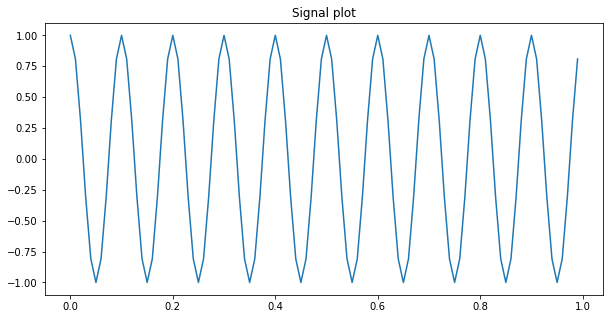

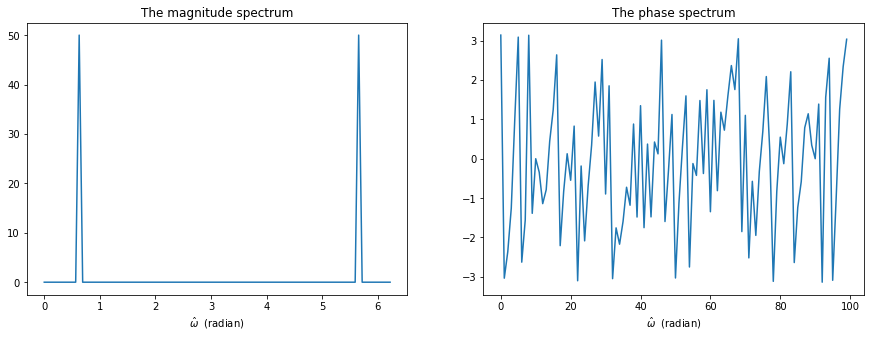

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fs = 100
t = np.arange(0, 1, 1/fs)
x = np.cos(2*np.pi*10*t)
plt.figure(figsize=[10,5])
plt.plot(t, x)
plt.title('Signal plot')

xf = np.fft.fft(x)
w_hat = np.arange(0, 2*np.pi, np.pi*2/fs)

plt.figure(figsize=[15,5])

plt.subplot(121)
plt.plot(w_hat, abs(xf))
plt.xlabel(r'$\hat\omega$  (radian)')
plt.title('The magnitude spectrum')

plt.subplot(122)
plt.plot(np.angle(xf))
plt.xlabel(r'$\hat\omega$  (radian)')
plt.title('The phase spectrum')


## 問題十
### 上圖為10Hz的圖形，用取樣頻率fs=100Hz 取樣
### <BR>(1) 下圖左為將信號取快速傅利葉轉換之後的結果，橫軸以數位頻率 $\hat\omega$ 表示，請利用數位頻率與類比頻率的轉換關係，將下圖的橫軸以類比頻率來表示。

### <BR>(2) 使用取最大值 np.max, np.argmax，來自動從頻譜中找出類比頻率。

### <BR>(3) 複製以上程式，將弦波頻率改為30，並繪出頻譜，且利用上一題的結果來自動找尋頻譜中的最大peak. 
    
### <BR>(4) 複製以上程式，將弦波頻率改為60，並繪出頻譜，且利用上一題的結果來自動找尋頻譜中的最大peak.
    
### <BR>(5) 利用上星期實驗七的介面範例，製作兩個滑桿，動態調控弦波頻率以及取樣頻率，並即時以頻譜來獲得最大peak對應之頻率
    

## (1)

Text(0.5, 1.0, 'The phase spectrum')

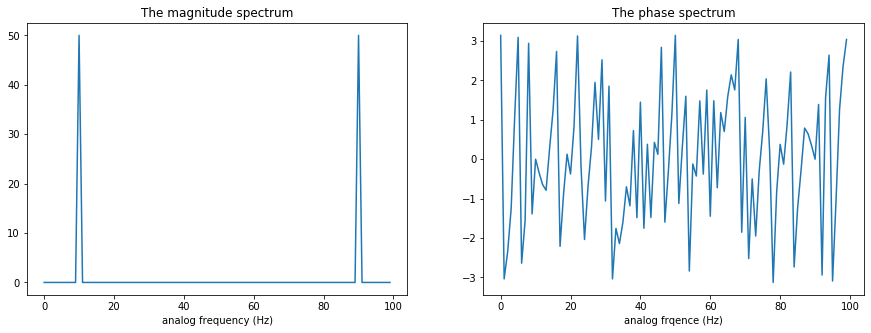

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fs = 100
t = np.arange(0, 1, 1/fs)
x = np.cos(2*np.pi*10*t)
xf = np.fft.fft(x)
w_hat = np.arange(0, 2*np.pi, 2*np.pi/fs)
f_analog = w_hat/(2*np.pi) * fs

plt.figure(figsize=[15,5])

plt.subplot(121)
plt.plot(f_analog, abs(xf))
plt.xlabel('analog frequency (Hz)')
plt.title('The magnitude spectrum')

plt.subplot(122)
plt.plot(np.angle(xf))
plt.xlabel('analog frqence (Hz)')
plt.title('The phase spectrum')

## (2)

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fs = 100
t = np.arange(0, 1, 1/fs)
x = np.cos(2*np.pi*10*t)
xf = np.fft.fft(x)
w_hat = np.arange(0, 2*np.pi, 2*np.pi/fs)
f_analog = w_hat/(2*np.pi) * fs


xf_half = np.hsplit(xf,2)
xf_max_index0 = np.argmax(xf_half[0])
xf_max_index1 = np.argmax(xf_half[1]) + fs/2
print('Analog freqence is ',xf_max_index0,'Hz and ',xf_max_index1,'Hz')

Analog freqence is  10 Hz and  90.0 Hz


## (3)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fs = 100
t = np.arange(0, 1, 1/fs)
x = np.cos(2*np.pi*30*t)
xf = np.fft.fft(x)
w_hat = np.arange(0, 2*np.pi, 2*np.pi/fs)
f_analog = w_hat/(2*np.pi) * fs


xf_half = np.hsplit(xf,2)
xf_max_index0 = np.argmax(xf_half[0])
xf_max_index1 = np.argmax(xf_half[1]) + fs/2
print('Analog freqence is ',xf_max_index0,'Hz and ',xf_max_index1,'Hz')

Analog freqence is  30 Hz and  70.0 Hz


## (4)

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fs = 100
t = np.arange(0, 1, 1/fs)
x = np.cos(2*np.pi*60*t)
xf = np.fft.fft(x)
w_hat = np.arange(0, 2*np.pi, 2*np.pi/fs)
f_analog = w_hat/(2*np.pi) * fs


xf_half = np.hsplit(xf,2)
xf_max_index0 = np.argmax(xf_half[0])
xf_max_index1 = np.argmax(xf_half[1]) + fs/2
print('Analog freqence is ',xf_max_index0,'Hz and ',xf_max_index1,'Hz')

Analog freqence is  40 Hz and  60.0 Hz


## (5)

In [46]:
#coding: utf-8
%matplotlib inline
import numpy as np
import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from IPython.display import display
from skimage.transform import rotate

f_lims = (10, 100, 10)
fs_lims = (100,1000,100)

def f_change(f = 10, fs = 100):
    t = np.arange(0, 1, 1/fs)
    x = np.cos(2*np.pi*f*t)
    xf = np.fft.fft(x)
    w_hat = np.arange(0, 2*np.pi, 2*np.pi/fs)
    f_analog = w_hat/(2*np.pi) * fs
    
    plt.plot(f_analog, abs(xf))
    plt.xlabel('analog frqence (Hz)')
    plt.title('The magnitude spectrum')
    
    xf_half = np.hsplit(xf,2)
    xf_max_index0 = np.argmax(xf_half[0])
    xf_max_index1 = np.argmax(xf_half[1]) + fs/2
    print('Analog freqence is ',xf_max_index0,'Hz and ',xf_max_index1,'Hz')

w = interactive(f_change, f=f_lims, fs=fs_lims)
display(w)

interactive(children=(IntSlider(value=10, description='f', min=10, step=10), IntSlider(value=100, description=…

## 實驗十一
### Convolution
### 執行以下程式碼並觀察輸出

<Container object of 3 artists>

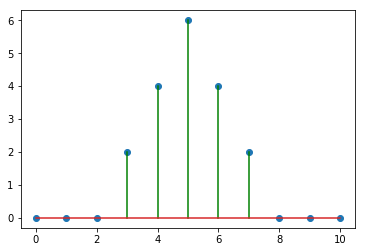

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.array([0.,0,0,2,4,6,4,2,0,0,0])
plt.stem(x, 'g')

## 問題十一

### <BR>(1) 以上圖x為輸入信號，設計一個有限脈衝響應濾波器 FIR filter, bk = [1/3, 1/3, 1/3]，意即 y[n]= 1/3\*x[n] + 1/3\*x[n-1] + 1/3\*x[n-2]，並畫出輸出信號y[n]
### 小提示:
<code>y = x\*0
y[0] = 1/3\*(x[0])
y[1] = 1/3\*(x[1] + x[0])
y[2] = 1/3\*(x[2] + x[1] + x[0])
y[3] = 1/3\*(x[3] + x[2] + x[1])
</code>
### 以此類推，哪部份可以改寫成for-loop?

### <BR>(2) 參考實驗八，產生三個cos 波形
<BR>X1: Amplitude: 1, Phase: 0 rad, Frequency: 1 Hz
<BR>X2: Amplitude: 0.2, Phase: 0 rad, Frequency: 60 Hz
<BR>X3(t) = X1(t) + X2(t)
### <BR>(3)將X3(t)以取樣頻率180Hz取樣之後，在同一個figure畫出X1[n]以及X3[n] (畫出對應類比總長度兩秒) 
### <BR>(4)將X3[n]輸入前面設計的FIR filter得到Y3[n]，畫出Y3[n]


## (1)
在 (x[3] + x[2] + x[1]) 可以改寫為for-loop

<code>y = x\*0
for i in y
    y[i] = 1/3\*(x[i] + x[i-1] + x[i-2])
</code>

## (2) (3)

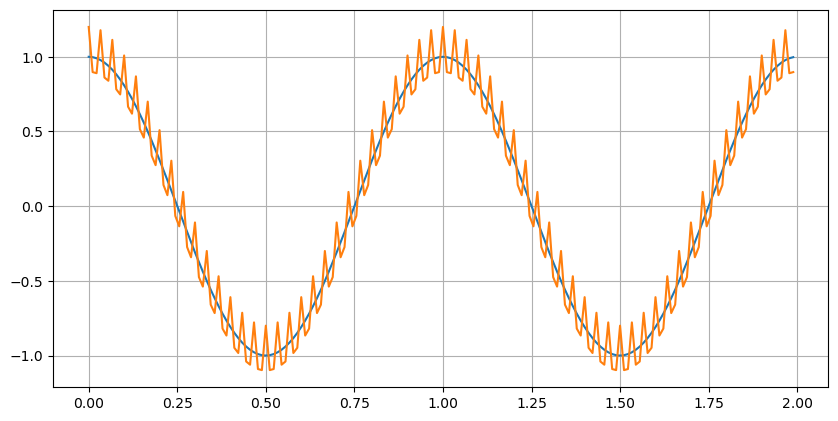

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fs = 180
t = np.arange(0, 2, 2/fs)
x1 = np.cos(2 * np.pi * 1 *t)
x2 = 0.2*np.cos(2 * np.pi * 60 *t)
x3 = x1 + x2

plt.figure(figsize=[10, 5],dpi=100)
plt.plot(t,  x1)
plt.plot(t,  x3)
plt.grid(True)

## (4)

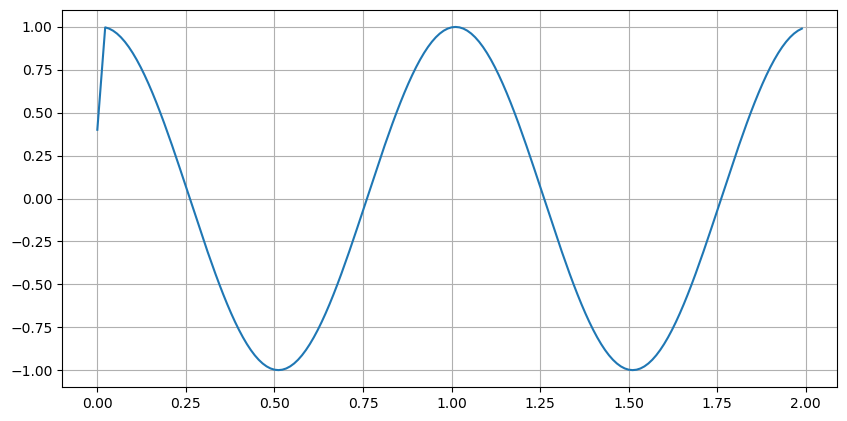

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fs = 180
t = np.arange(0, 2, 2/fs)
x1 = np.cos(2 * np.pi * 1 *t)
x2 = 0.2*np.cos(2 * np.pi * 60 *t)
x3 = x1 + x2

y = x3 * 0
for i in range(len(y)):
    if i == 0 :
        y[i] = (1/3) * (x3[i])
    elif i == 1:
        y[i] = (1/3) * (x3[i] + x3[i-1])
    else:
        y[i] = (1/3) * (x3[i] + x3[i-1] + x3[i-2])
        
plt.figure(figsize=[10, 5],dpi=100)
plt.plot(t,  y)
plt.grid(True)